BloomTech Data Science

*Unit 2, Sprint 1, Module 4*

---

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Logistic Regression

Do you like burritos? 🌯 You're in luck then, because in this project you'll create a model to predict whether a burrito is `'Great'`.

The dataset for this assignment comes from [Scott Cole](https://srcole.github.io/100burritos/), a San Diego-based data scientist and burrito enthusiast. 

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function .
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline accuracy score for your dataset.
- **Task 6:** Build `model_logr` using a pipeline that includes three transfomers and `LogisticRegression` predictor. Train model on `X_train` and `X_test`.
- **Task 7:** Calculate the training and test accuracy score for your model.
- **Task 8:** Create a horizontal bar chart showing the 10 most influencial features for your  model. 
- **Task 9:** Demonstrate and explain the differences between `model_lr.predict()` and `model_lr.predict_proba()`.

**Note** 

You should limit yourself to the following libraries:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [2]:
import pandas as pd
import numpy as np
import math
# from sklearn

In [3]:
def wrangle(filepath):
    # Import w/ DateTimeIndex
    df = pd.read_csv(filepath, parse_dates=['Date'],
                     index_col='Date')
    
    # Drop unrated burritos
    df.dropna(subset=['overall'], inplace=True)
    
    # Derive binary classification target:
    # We define a 'Great' burrito as having an
    # overall rating of 4 or higher, on a 5 point scale
    df['Great'] = (df['overall'] >= 4).astype(int)
    
    # Drop high cardinality categoricals
    df = df.drop(columns=['Notes', 'Location', 'Address', 'URL', 'Neighborhood'])
    
    # Drop columns to prevent "leakage"
    df = df.drop(columns=['Rec', 'overall'])

    # Replace x's with 0/1
    cols_with_x = []
    for col in df.columns:
      if 'x' in df[col].unique():
        cols_with_x.append(col)   
    # Loop through columns containing x's
    for col in cols_with_x:
      df[col] = np.where((df[col] == 'x') | (df[col] == 'X') , 1, 0)
    df['Queso'].fillna(0, inplace=True)

    # Drop burrito column
    df = df.drop('Burrito', axis=1)

    # Reset index 
    df = df.reset_index()
    
    return df

filepath = DATA_PATH + 'burritos/burritos.csv'

**Task 1:** Use the above `wrangle` function to import the `burritos.csv` file into a DataFrame named `df`.

In [4]:
filepath = DATA_PATH + 'burritos/burritos.csv'
df = wrangle(filepath)

<ipython-input-3-e11c7a7dc759>:23: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in df[col].unique():


During your exploratory data analysis, note that there are several columns whose data type is `object` but that seem to be a binary encoding. For example, `df['Beef'].head()` returns:

```
0      x
1      x
2    NaN
3      x
4      x
Name: Beef, dtype: object
```

**Task 2:** Change the `wrangle` function so that these columns are properly encoded as `0` and `1`s. Be sure your code handles upper- and lowercase `X`s, and `NaN`s.

In [8]:
# Conduct your exploratory data analysis here
# And modify the `wrangle` function above.
df.head()

,Date,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,2016-01-18,3.5,4.2,0,6.49,3.0,NaN,NaN,NaN,NaN,...,0,0.0,0,0,0,0,0,0,0,0
1,2016-01-24,3.5,3.3,0,5.45,3.5,NaN,NaN,NaN,NaN,...,0,0.0,0,0,0,0,0,0,0,0
2,2016-01-24,NaN,NaN,0,4.85,1.5,NaN,NaN,NaN,NaN,...,0,0.0,0,0,0,0,0,0,0,0
3,2016-01-24,NaN,NaN,0,5.25,2.0,NaN,NaN,NaN,NaN,...,0,0.0,0,0,0,0,0,0,0,0
4,2016-01-27,4.0,3.8,1,6.59,4.0,NaN,NaN,NaN,NaN,...,0,0.0,0,0,0,0,0,0,0,1


In [123]:
df = df.reset_index()

In [124]:
print(df.shape)
df.head()

(421, 60)


,Date,Burrito,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,2016-01-18,California,3.5,4.2,NaN,6.49,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2016-01-24,California,3.5,3.3,NaN,5.45,3.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2016-01-24,Carnitas,NaN,NaN,NaN,4.85,1.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2016-01-24,Carne asada,NaN,NaN,NaN,5.25,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2016-01-27,California,4.0,3.8,x,6.59,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [125]:
df.isnull().sum()

Date                0
Burrito             0
Yelp              334
Google            334
Chips             395
Cost                7
Hunger              3
Mass (g)          399
Density (g/mL)    399
Length            138
Circum            140
Volume            140
Tortilla            0
Temp               20
Meat               14
Fillings            3
Meat:filling        9
Uniformity          2
Salsa              25
Synergy             2
Wrap                3
Reviewer            1
Unreliable        388
NonSD             414
Beef              242
Pico              263
Guac              267
Cheese            262
Fries             294
Sour cream        329
Pork              370
Chicken           400
Shrimp            400
Fish              415
Rice              385
Beans             386
Lettuce           410
Tomato            414
Bell peper        414
Carrots           420
Cabbage           413
Sauce             383
Salsa.1           414
Cilantro          406
Onion             404
Taquito   

In [30]:
for col in df.columns:
  print(df[col].value_counts())

2016-08-30    29
2019-08-27     9
2016-06-24     9
2016-05-06     7
2016-04-15     7
              ..
2016-06-09     1
2017-06-16     1
2017-07-13     1
2017-07-12     1
2016-01-18     1
Name: Date, Length: 169, dtype: int64
California              101
Carne asada              29
California               26
Carnitas                 23
Local                    14
                       ... 
Philly                    1
California breakfast      1
Pollo california          1
Bean and Cheese           1
Pollo Asado               1
Name: Burrito, Length: 132, dtype: int64
4.0    41
3.5    18
4.5    18
3.0     7
2.5     2
4.2     1
Name: Yelp, dtype: int64
4.1    12
4.4    12
4.2    11
4.0     9
3.8     6
4.5     6
4.3     6
3.9     6
4.7     4
4.6     3
3.4     2
4.9     2
3.3     2
3.7     2
2.9     1
3.5     1
5.0     1
4.8     1
Name: Google, dtype: int64
x      21
X       3
Yes     1
No      1
Name: Chips, dtype: int64
6.25     40
5.99     23
6.99     23
7.90     20
8.25     17
        

In [126]:
cols_with_x = []
for col in df.columns:
  if 'x' in df[col].unique():
    cols_with_x.append(col)

<ipython-input-126-0bb255750b0c>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in df[col].unique():


In [128]:
# x = df['Pineapple'][0]
for col in cols_with_x:
  df[col] = np.where((df[col] == 'x') | (df[col] == 'X') , 1, 0)
df['Queso'].fillna(0, inplace=True)

In [129]:
df.head()

,Date,Burrito,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,2016-01-18,California,3.5,4.2,0,6.49,3.0,NaN,NaN,NaN,...,0,0.0,0,0,0,0,0,0,0,0
1,2016-01-24,California,3.5,3.3,0,5.45,3.5,NaN,NaN,NaN,...,0,0.0,0,0,0,0,0,0,0,0
2,2016-01-24,Carnitas,NaN,NaN,0,4.85,1.5,NaN,NaN,NaN,...,0,0.0,0,0,0,0,0,0,0,0
3,2016-01-24,Carne asada,NaN,NaN,0,5.25,2.0,NaN,NaN,NaN,...,0,0.0,0,0,0,0,0,0,0,0
4,2016-01-27,California,4.0,3.8,0,6.59,4.0,NaN,NaN,NaN,...,0,0.0,0,0,0,0,0,0,0,1


In [99]:
for col in cols_with_x:
  print(df[col].value_counts())

0    397
1     24
Name: Chips, dtype: int64
0    388
1     33
Name: Unreliable, dtype: int64
0    414
1      7
Name: NonSD, dtype: int64
0    242
1    179
Name: Beef, dtype: int64
0    263
1    158
Name: Pico, dtype: int64
0    267
1    154
Name: Guac, dtype: int64
0    262
1    159
Name: Cheese, dtype: int64
0    294
1    127
Name: Fries, dtype: int64
0    329
1     92
Name: Sour cream, dtype: int64
0    370
1     51
Name: Pork, dtype: int64
0    400
1     21
Name: Chicken, dtype: int64
0    400
1     21
Name: Shrimp, dtype: int64
0    415
1      6
Name: Fish, dtype: int64
0    385
1     36
Name: Rice, dtype: int64
0    386
1     35
Name: Beans, dtype: int64
0    410
1     11
Name: Lettuce, dtype: int64
0    414
1      7
Name: Tomato, dtype: int64
0    414
1      7
Name: Bell peper, dtype: int64
0    420
1      1
Name: Carrots, dtype: int64
0    413
1      8
Name: Cabbage, dtype: int64
0    383
1     38
Name: Sauce, dtype: int64
0    414
1      7
Name: Salsa.1, dtype: int64
0    406
1

In [130]:
df.isnull().sum()

Date                0
Burrito             0
Yelp              334
Google            334
Chips               0
Cost                7
Hunger              3
Mass (g)          399
Density (g/mL)    399
Length            138
Circum            140
Volume            140
Tortilla            0
Temp               20
Meat               14
Fillings            3
Meat:filling        9
Uniformity          2
Salsa              25
Synergy             2
Wrap                3
Reviewer            1
Unreliable          0
NonSD               0
Beef                0
Pico                0
Guac                0
Cheese              0
Fries               0
Sour cream          0
Pork                0
Chicken             0
Shrimp              0
Fish                0
Rice                0
Beans               0
Lettuce             0
Tomato              0
Bell peper          0
Carrots             0
Cabbage             0
Sauce               0
Salsa.1             0
Cilantro            0
Onion               0
Taquito   

In [111]:
columns = df.columns
for col in columns:
 if df[col].isnull().sum() > 380:
   df.drop(col, axis=1, inplace=True)

In [112]:
df.isnull().sum()

Date               0
Burrito            0
Yelp             334
Google           334
Chips              0
Cost               7
Hunger             3
Length           138
Circum           140
Volume           140
Tortilla           0
Temp              20
Meat              14
Fillings           3
Meat:filling       9
Uniformity         2
Salsa             25
Synergy            2
Wrap               3
Reviewer           1
Unreliable         0
NonSD              0
Beef               0
Pico               0
Guac               0
Cheese             0
Fries              0
Sour cream         0
Pork               0
Chicken            0
Shrimp             0
Fish               0
Rice               0
Beans              0
Lettuce            0
Tomato             0
Bell peper         0
Carrots            0
Cabbage            0
Sauce              0
Salsa.1            0
Cilantro           0
Onion              0
Taquito            0
Pineapple          0
Ham                0
Chile relleno      0
Nopales      

In [132]:
df['Wrap'].value_counts()

5.0    137
4.0     89
4.5     65
3.0     41
3.5     20
2.0     18
1.5     11
1.0      9
2.5      8
0.5      4
4.8      3
3.8      2
3.3      1
4.2      1
4.3      1
3.4      1
3.7      1
0.0      1
2.6      1
1.2      1
2.2      1
3.9      1
2.8      1
Name: Wrap, dtype: int64

In [115]:
df['Cost'].dtype

dtype('float64')

In [118]:
df.describe()

,Yelp,Google,Chips,Cost,Hunger,Length,Circum,Volume,Tortilla,Temp,...,Nopales,Lobster,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
count,87.000000,87.000000,421.000000,414.000000,418.000000,283.000000,281.000000,281.000000,421.000000,401.000000,...,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,3.887356,4.167816,0.057007,7.067343,3.495335,20.038233,22.135765,0.786477,3.519477,3.783042,...,0.009501,0.002375,0.011876,0.007126,0.007126,0.004751,0.030879,0.007126,0.002375,0.432304
std,0.475396,0.373698,0.232132,1.506742,0.812069,2.083518,1.779408,0.152531,0.794438,0.980338,...,0.097125,0.048737,0.108459,0.084214,0.084214,0.068842,0.173195,0.084214,0.048737,0.495985
min,2.500000,2.900000,0.000000,2.990000,0.500000,15.000000,17.000000,0.400000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,4.000000,0.000000,6.250000,3.000000,18.500000,21.000000,0.680000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.200000,0.000000,6.990000,3.500000,20.000000,22.000000,0.770000,3.500000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.400000,0.000000,7.880000,4.000000,21.500000,23.000000,0.880000,4.000000,4.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.500000,5.000000,1.000000,25.000000,5.000000,26.000000,29.000000,1.540000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


If you explore the `'Burrito'` column of `df`, you'll notice that it's a high-cardinality categorical feature. You'll also notice that there's a lot of overlap between the categories. 

**Stretch Goal:** Change the `wrangle` function above so that it engineers four new features: `'california'`, `'asada'`, `'surf'`, and `'carnitas'`. Each row should have a `1` or `0` based on the text information in the `'Burrito'` column. For example, here's how the first 5 rows of the dataset would look.

| **Burrito** | **california** | **asada** | **surf** | **carnitas** |
| :---------- | :------------: | :-------: | :------: | :----------: |
| California  |       1        |     0     |    0     |      0       |
| California  |       1        |     0     |    0     |      0       |
|  Carnitas   |       0        |     0     |    0     |      1       |
| Carne asada |       0        |     1     |    0     |      0       |
| California  |       1        |     0     |    0     |      0       |

**Note:** Be sure to also drop the `'Burrito'` once you've engineered your new features.

In [ ]:
# Conduct your exploratory data analysis here
# And modify the `wrangle` function above.

# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'Great'`.

In [5]:
# make train test split

cutoff = pd.to_datetime('2018-01-01')

train = df[df['Date'] < cutoff]
test = df[df['Date'] > cutoff]

In [6]:
target = 'Great'

X = df.drop(target, axis=1)
y = df[target]

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from 2016 through 2017. 
- Your test set should include data from 2018 and later.

In [7]:
X_train, y_train = train.drop(target, axis=1), train[target]
X_test, y_test = test.drop(target, axis=1), test[target]

In [8]:
X_train = X_train.drop('Date', axis=1) 
X_test = X_test.drop('Date', axis=1)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((383, 57), (383,), (38, 57), (38,))

# III. Establish Baseline

**Task 5:** Since this is a **classification** problem, you should establish a baseline accuracy score. Figure out what is the majority class in `y_train` and what percentage of your training observations it represents. 

In [10]:
y_train.value_counts()

0    223
1    160
Name: Great, dtype: int64

In [11]:
majority_class = len(y_train[y_train == 0])

baseline_acc = majority_class/len(y_train)
print('Baseline Accuracy Score:', baseline_acc)

Baseline Accuracy Score: 0.5822454308093995


# IV. Build Model

**Task 6:** Build a `Pipeline` named `model_logr`, and fit it to your training data. Your pipeline should include:

- a `OneHotEncoder` transformer for categorical features, 
- a `SimpleImputer` transformer to deal with missing values, 
- a [`StandarScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) transfomer (which often improves performance in a logistic regression model), and 
- a `LogisticRegression` predictor.

In [12]:
from sklearn.pipeline import make_pipeline, Pipeline
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [13]:
model_logr = Pipeline([('encoder', OneHotEncoder()), ('imputer', SimpleImputer()), ('scaler', StandardScaler()), ('model', LogisticRegression())])

In [14]:
model_logr.fit(X_train, y_train)

Pipeline(steps=[('encoder', OneHotEncoder(cols=['Reviewer'])),
                ('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', LogisticRegression())])

# IV. Check Metrics

**Task 7:** Calculate the training and test accuracy score for `model_lr`.

In [200]:
from sklearn.metrics import accuracy_score

In [15]:
training_acc = model_logr.score(X_train, y_train)
test_acc = model_logr.score(X_test, y_test)

print('Training MAE:', training_acc)
print('Test MAE:', test_acc)

Training MAE: 0.9686684073107049
Test MAE: 0.7894736842105263


# V. Communicate Results

**Task 8:** Create a horizontal barchart that plots the 10 most important coefficients for `model_lr`, sorted by absolute value.

**Note:** Since you created your model using a `Pipeline`, you'll need to use the [`named_steps`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) attribute to access the coefficients in your `LogisticRegression` predictor. Be sure to look at the shape of the coefficients array before you combine it with the feature names.

In [33]:
# Create your horizontal barchart here.
model_logr.named_steps['model'].coef_.shape

(1, 149)

In [39]:
len(model_logr.named_steps['encoder'].get_feature_names())

149

In [16]:
steps = model_logr.named_steps

coefs = steps['model'].coef_
feature_names = steps['encoder'].get_feature_names()

/usr/local/lib/python3.8/dist-packages/category_encoders/utils.py:360: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


In [48]:
coefs[0]

array([ 5.17945721e-01, -3.75383096e-01,  1.55139107e-01,  6.99522146e-01,
       -1.08370430e-01, -2.55587688e-01, -1.31342378e-01, -6.16250862e-03,
        1.31167164e-02, -2.37930969e-01,  4.66079857e-01,  8.34802843e-01,
        1.42554676e+00,  1.55660217e+00,  1.27801608e+00, -9.39669341e-02,
        3.33808769e-01,  2.71102159e+00, -1.33694549e-01, -2.23748583e-01,
       -2.12209313e-01,  1.93627720e-01, -1.27927330e-01, -1.75194866e-03,
        2.50025526e-01, -3.99078417e-03, -4.94123793e-02, -7.25310799e-02,
       -2.92327987e-01, -3.92927425e-01, -8.17187419e-02, -1.69690491e-02,
       -1.52222528e-01, -2.60615869e-01,  2.76012998e-02,  2.13115649e-01,
        2.14185885e-01, -3.98646555e-01,  3.31084404e-01, -1.80575010e-01,
        4.71190404e-05,  9.49437697e-03, -2.69963783e-01,  1.02753277e+00,
        4.78532213e-02,  5.11540071e-04, -5.63084248e-01,  3.61665600e-01,
        8.38381419e-02,  5.79216426e-02,  8.12778301e-02,  1.49155499e-01,
        1.74709099e-01,  

In [24]:
coef_data = pd.DataFrame(coefs[0], index=feature_names, columns=['Coefficients'])
coef_data = coef_data.reindex(coef_data['Coefficients'].abs().sort_values().index)

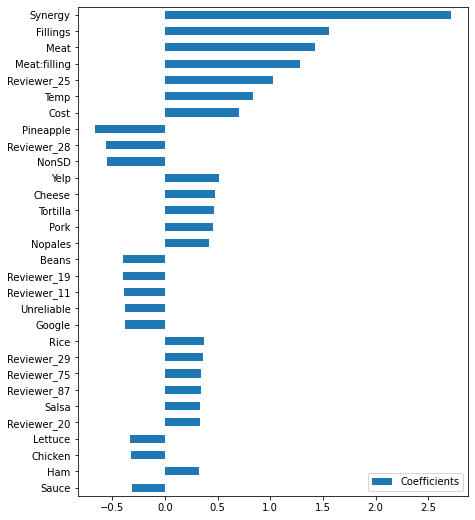

In [31]:
coef_data[119:].plot.barh(figsize=(7, 9))

There is more than one way to generate predictions with `model_lr`. For instance, you can use [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression) or [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression.predict_proba).

**Task 9:** Generate predictions for `X_test` using both `predict` and `predict_proba`. Then below, write a summary of the differences in the output for these two methods. You should answer the following questions:

- What data type do `predict` and `predict_proba` output?
- What are the shapes of their different output?
- What numerical values are in the output?
- What do those numerical values represent?

In [36]:
# Write code here to explore the differences between `predict` and `predict_proba`.
preds = model_logr.predict(X_test)
print(len(preds))
preds

38


array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [37]:
preds_proba = model_logr.predict_proba(X_test)
print(len(preds_proba))
preds_proba

38


array([[2.00375897e-05, 9.99979962e-01],
       [1.47950853e-03, 9.98520491e-01],
       [9.03365791e-01, 9.66342089e-02],
       [9.83212374e-05, 9.99901679e-01],
       [9.98936135e-01, 1.06386451e-03],
       [9.75313534e-01, 2.46864655e-02],
       [2.49138019e-02, 9.75086198e-01],
       [8.02045296e-05, 9.99919795e-01],
       [7.32555416e-05, 9.99926744e-01],
       [1.94947727e-01, 8.05052273e-01],
       [8.45053845e-01, 1.54946155e-01],
       [9.60609608e-01, 3.93903919e-02],
       [4.23452500e-01, 5.76547500e-01],
       [3.75437642e-01, 6.24562358e-01],
       [2.44237204e-02, 9.75576280e-01],
       [6.70719507e-02, 9.32928049e-01],
       [1.87004415e-01, 8.12995585e-01],
       [9.99193101e-01, 8.06898599e-04],
       [9.98654105e-01, 1.34589522e-03],
       [9.99625896e-01, 3.74104178e-04],
       [9.97176208e-01, 2.82379250e-03],
       [5.05110273e-03, 9.94948897e-01],
       [7.85886378e-01, 2.14113622e-01],
       [9.59581182e-03, 9.90404188e-01],
       [2.366117

**Give your written answer here:**

```
predict gives final predictions for an array, they are bianary integers 0/1

predict_proba returns probabilities for each entry to be either 1 or 0

```